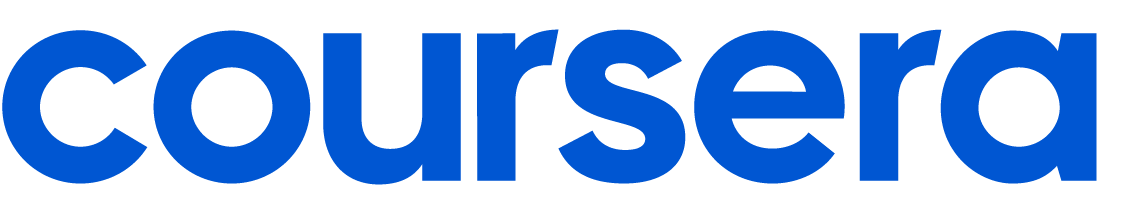

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
# your code here (optional)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [7]:
df_categorical = train_df[['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled','Churn']]
print(df_categorical.info())
df_categorical.head()

df_categorical_test = test_df[['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered','GenrePreference','Gender','ParentalControl','SubtitlesEnabled']]
print(df_categorical_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   SubscriptionType   243787 non-null  object
 1   PaymentMethod      243787 non-null  object
 2   PaperlessBilling   243787 non-null  object
 3   ContentType        243787 non-null  object
 4   MultiDeviceAccess  243787 non-null  object
 5   DeviceRegistered   243787 non-null  object
 6   GenrePreference    243787 non-null  object
 7   Gender             243787 non-null  object
 8   ParentalControl    243787 non-null  object
 9   SubtitlesEnabled   243787 non-null  object
 10  Churn              243787 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 20.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 

In [8]:
# dividing data into categorical and numerical data table with customer id and churn

df_numerical = train_df.drop(df_categorical.columns.tolist(), axis = 1)
df_numerical['Churn'] = train_df['Churn']
print(df_numerical.info())
df_numerical.head()

df_numerical_test = test_df.drop(df_categorical_test.columns.tolist(), axis = 1)
print(df_numerical_test.info())
df_numerical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   ViewingHoursPerWeek       243787 non-null  float64
 4   AverageViewingDuration    243787 non-null  float64
 5   ContentDownloadsPerMonth  243787 non-null  int64  
 6   UserRating                243787 non-null  float64
 7   SupportTicketsPerMonth    243787 non-null  int64  
 8   WatchlistSize             243787 non-null  int64  
 9   CustomerID                243787 non-null  object 
 10  Churn                     243787 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 20.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (t

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,Churn
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,CB6SXPNVZA,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,S7R2G87O09,0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,EASDC20BDT,0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,NPF69NT69N,0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,4LGYPK7VOL,0


In [9]:
df_numerical.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


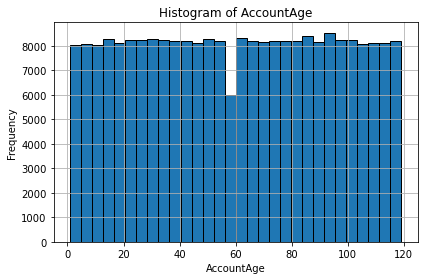

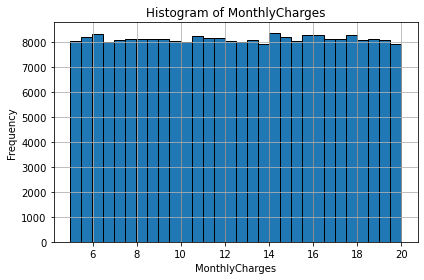

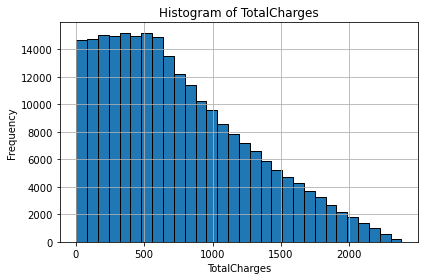

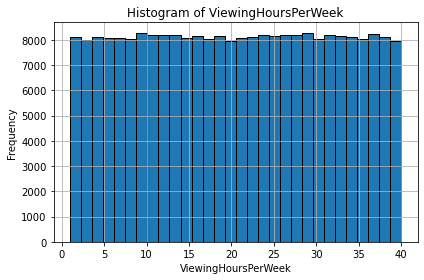

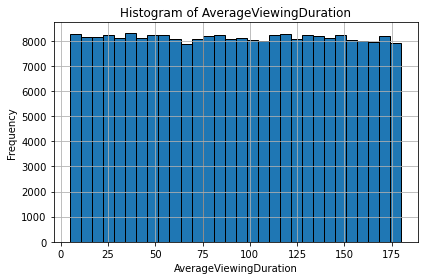

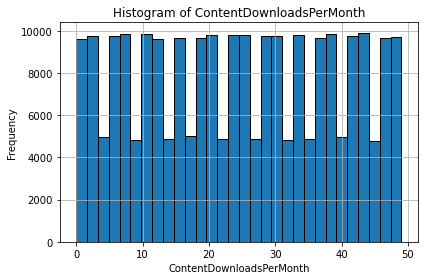

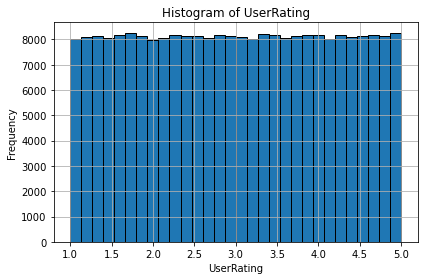

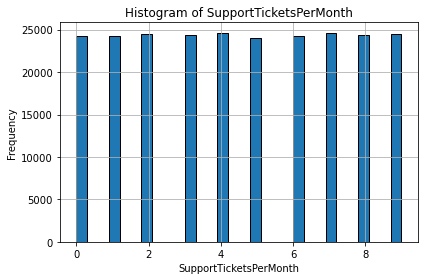

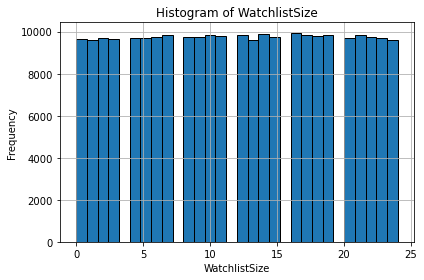

In [10]:
def build_hist(df, target = 'Churn'):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    for column in numeric_cols:
        if column == target:
            continue  # skip churn
        try:
            plt.figure(figsize=(6, 4))
            plt.hist(df[column].dropna(), bins=30, edgecolor='black')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.tight_layout()
            plt.show() 
        except Exception as e:
                print(f"Could not plot {column}: {e}")
        

    
build_hist(df_numerical)

# evenly distributed but TotalCharges is rightly skewed.

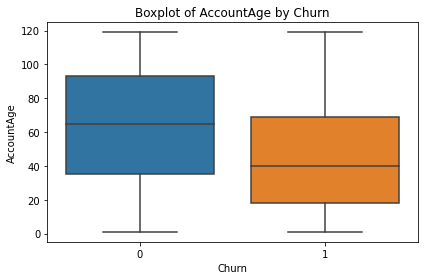

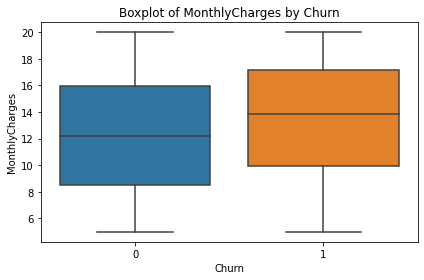

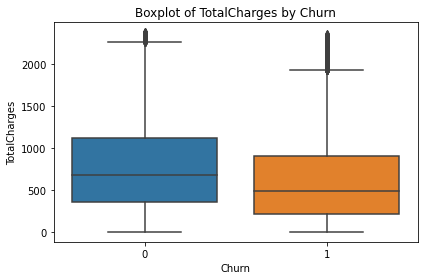

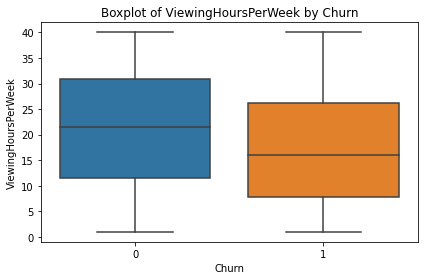

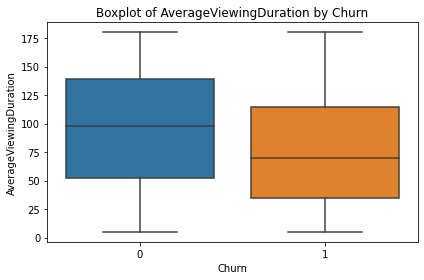

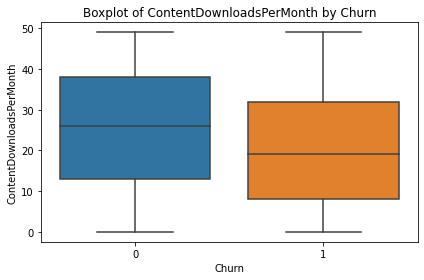

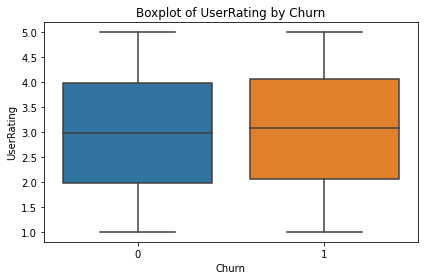

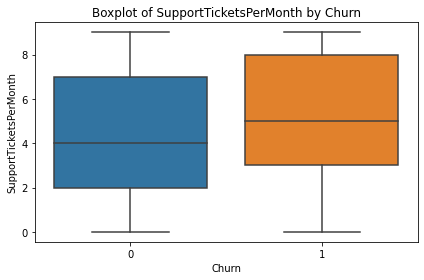

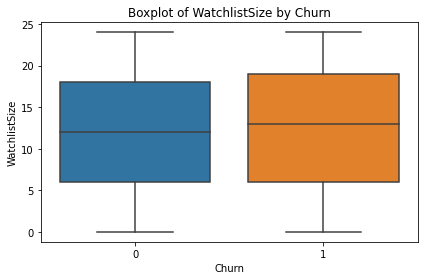

In [11]:
def build_boxplot(df, target='Churn'):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    for column in numeric_cols:
        if column == target:
            continue  # Skip the target column itself
        try:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=target, y=column, data=df)
            plt.title(f"Boxplot of {column} by {target}")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not plot {column}: {e}")
        
build_boxplot(df_numerical)
# detect outliers on TotalCharges
# user rating and watch list may not be relevant to the churn rate. drop them


In [12]:
df_numerical = df_numerical.drop(['UserRating','WatchlistSize'], axis = 1)

df_numerical_test = df_numerical_test.drop(['UserRating','WatchlistSize'], axis = 1)

In [13]:
df_numerical['ViewingHoursPerMonth'] = df_numerical['ViewingHoursPerWeek'] * 52 /12
df_numerical['ViewingHoursPerCharges_month'] = df_numerical['ViewingHoursPerMonth']/ df_numerical['MonthlyCharges']
df_numerical.head()

df_numerical_test['ViewingHoursPerMonth'] = df_numerical_test['ViewingHoursPerWeek'] * 52 /12
df_numerical_test['ViewingHoursPerCharges_month'] = df_numerical_test['ViewingHoursPerMonth']/ df_numerical_test['MonthlyCharges']
df_numerical_test.head()


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,CustomerID,ViewingHoursPerMonth,ViewingHoursPerCharges_month
0,38,17.869374,679.036195,29.126308,122.274031,42,2,O1W6BHP6RM,126.214001,7.063146
1,77,9.912854,763.289768,36.873729,57.093319,43,2,LFR4X92X8H,159.786161,16.119087
2,5,15.019011,75.095057,7.601729,140.414001,14,2,QM5GBIYODA,32.940827,2.193275
3,88,15.357406,1351.451692,35.586430,177.002419,14,0,D9RXTK2K9F,154.207862,10.041270
4,91,12.406033,1128.949004,23.503651,70.308376,6,6,ENTCCHR1LR,101.849154,8.209647


Biserial correlation of AccountAge :  -0.19773563199738653    p_value :  0.0
Biserial correlation of AverageViewingDuration :  -0.14689656866689924    p_value :  0.0
Biserial correlation of ContentDownloadsPerMonth :  -0.12975187419254744    p_value :  0.0
Biserial correlation of ViewingHoursPerCharges_month :  -0.14373587559220605    p_value :  0.0
Done


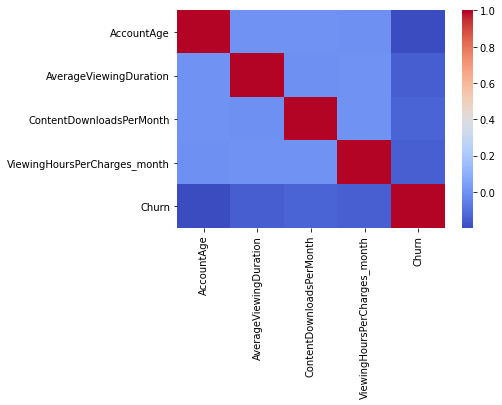

In [14]:
df_numerical = df_numerical[['AccountAge','AverageViewingDuration','ContentDownloadsPerMonth','ViewingHoursPerCharges_month','Churn']]
from scipy.stats import pointbiserialr
for column in df_numerical.columns.tolist() :
    if  column == 'Churn' :
        print('Done')
    else :
        corr, p = pointbiserialr(df_numerical[column], df_numerical['Churn'])
        print(f'Biserial correlation of {column} : ',  corr, '   p_value : ', p)
corr = df_numerical.corr()        
sns.heatmap(corr, cmap = 'coolwarm')

df_numerical_test = df_numerical_test[['AccountAge','AverageViewingDuration','ContentDownloadsPerMonth','ViewingHoursPerCharges_month','CustomerID']]

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for column in df_numerical.columns.tolist():
    if column == 'Churn':
        print('Done')
    else:
        # Reshape to 2D, then flatten back after scaling
        df_numerical[column] = ss.fit_transform(df_numerical[column].values.reshape(-1, 1)).flatten()

df_numerical.head()

for column in df_numerical_test.columns.tolist():
    if column == 'CustomerID':
        print('Done')
    else:
        # Reshape to 2D, then flatten back after scaling
        df_numerical_test[column] = ss.fit_transform(df_numerical_test[column].values.reshape(-1, 1)).flatten()

df_numerical_test.head()

Done
Done


,AccountAge,AverageViewingDuration,ContentDownloadsPerMonth,ViewingHoursPerCharges_month,CustomerID
0,-0.643570,0.585171,1.214366,-0.196638,O1W6BHP6RM
1,0.493959,-0.702192,1.283565,1.321610,LFR4X92X8H
2,-1.606093,0.943448,-0.723184,-1.013082,QM5GBIYODA
3,0.814800,1.666094,-0.723184,0.302651,D9RXTK2K9F
4,0.902302,-0.441186,-1.276769,-0.004425,ENTCCHR1LR


In [16]:
df_categorical.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,Churn
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No,0
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes,0
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes,0
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes,0
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No,0


In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df_categorical, feature, target='Churn'):
    table = pd.crosstab(df_categorical[feature], df_categorical[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return chi2, p

# Example
for col in df_categorical.columns:
    chi2, p = chi_square_test(df_categorical, col)
    print(f"{col}: p-value = {p:.4f}")


SubscriptionType: p-value = 0.0000
PaymentMethod: p-value = 0.0000
PaperlessBilling: p-value = 0.6525
ContentType: p-value = 0.0000
MultiDeviceAccess: p-value = 0.5291
DeviceRegistered: p-value = 0.4171
GenrePreference: p-value = 0.0000
Gender: p-value = 0.0002
ParentalControl: p-value = 0.0064
SubtitlesEnabled: p-value = 0.0000
Churn: p-value = 0.0000


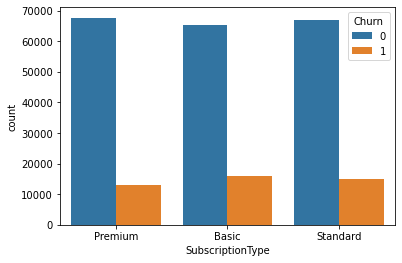

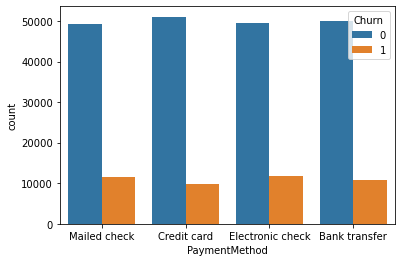

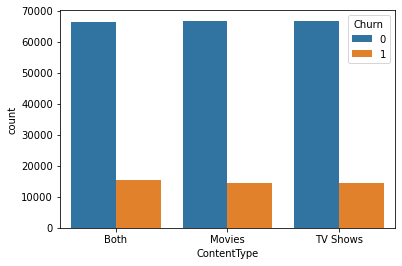

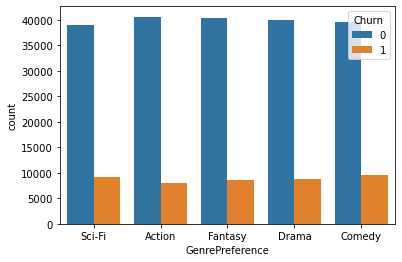

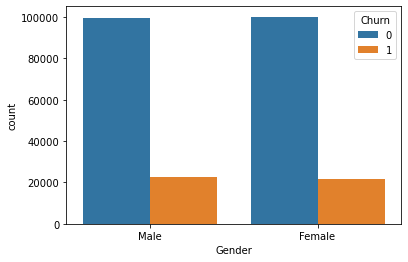

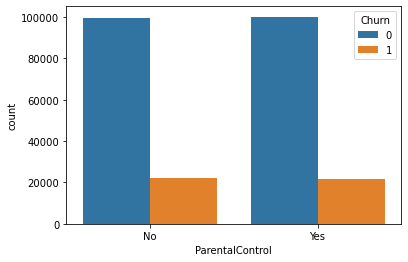

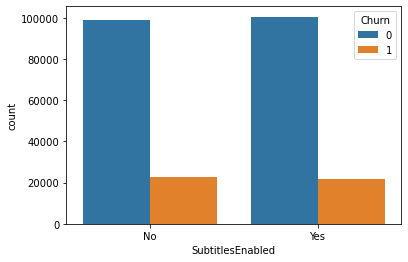

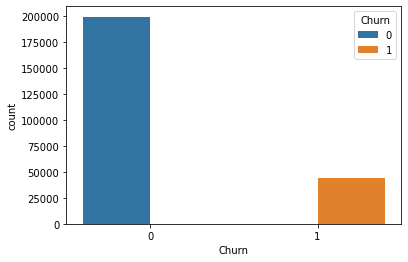

In [18]:
# drop 'PaperlessBilling','MultiDeviceAccess','DeviceRegistered'

df_categorical = df_categorical.drop(['PaperlessBilling','MultiDeviceAccess','DeviceRegistered'], axis = 1)
df_categorical.head()
df_categorical_test = df_categorical_test.drop(['PaperlessBilling','MultiDeviceAccess','DeviceRegistered'], axis = 1)
for col in df_categorical.columns :
    sns.countplot(x=col, hue='Churn', data=df_categorical)
    plt.show()


In [19]:
for column in df_categorical.columns :
    print(f"Unique values of {column}", df_categorical[column].unique())

Unique values of SubscriptionType ['Premium' 'Basic' 'Standard']
Unique values of PaymentMethod ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
Unique values of ContentType ['Both' 'Movies' 'TV Shows']
Unique values of GenrePreference ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Unique values of Gender ['Male' 'Female']
Unique values of ParentalControl ['No' 'Yes']
Unique values of SubtitlesEnabled ['No' 'Yes']
Unique values of Churn [0 1]


In [20]:
df_categorical_dummy = df_categorical[['Gender','ParentalControl','SubtitlesEnabled']]
df_categorical_dummy = pd.get_dummies(df_categorical_dummy)
print(df_categorical_dummy)

df_categorical_test_dummy = df_categorical_test[['Gender','ParentalControl','SubtitlesEnabled']]
df_categorical_test_dummy = pd.get_dummies(df_categorical_test_dummy)

        Gender_Female  Gender_Male  ParentalControl_No  ParentalControl_Yes  \
0                   0            1                   1                    0   
1                   0            1                   1                    0   
2                   0            1                   0                    1   
3                   0            1                   0                    1   
4                   1            0                   1                    0   
...               ...          ...                 ...                  ...   
243782              0            1                   0                    1   
243783              0            1                   1                    0   
243784              0            1                   0                    1   
243785              1            0                   1                    0   
243786              1            0                   0                    1   

        SubtitlesEnabled_No  SubtitlesEnabled_Yes  

In [21]:
df_categorical_label = df_categorical[['SubscriptionType','PaymentMethod','ContentType', 'GenrePreference']]
df_categorical_test_label = df_categorical_test[['SubscriptionType','PaymentMethod','ContentType', 'GenrePreference']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df_categorical_label.copy()
df_test_encoded = df_categorical_test_label.copy()
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])
    df_test_encoded[column] = le.fit_transform(df_test_encoded[column])
df_encoded


df_categorical = pd.concat([df_encoded,df_categorical_dummy], axis = 1)
df_categorical_test = pd.concat([df_test_encoded, df_categorical_test_dummy], axis = 1)
df_categorical.head()

,SubscriptionType,PaymentMethod,ContentType,GenrePreference,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,1,3,0,4,0,1,1,0,1,0
1,0,1,1,0,0,1,1,0,0,1
2,0,3,1,3,0,1,0,1,0,1
3,0,2,2,2,0,1,0,1,0,1
4,1,2,2,1,1,0,1,0,1,0


In [22]:
df_cleaned = pd.concat([df_categorical, df_numerical], axis = 1)
df_test = pd.concat([df_categorical_test, df_numerical_test], axis = 1)

df_cleaned.head()

,SubscriptionType,PaymentMethod,ContentType,GenrePreference,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes,AccountAge,AverageViewingDuration,ContentDownloadsPerMonth,ViewingHoursPerCharges_month,Churn
0,1,3,0,4,0,1,1,0,1,0,-1.169131,-0.568906,-1.005712,1.037182,0
1,0,1,1,0,0,1,1,0,0,1,-0.089945,-1.317459,-0.450971,3.178229,0
2,0,3,1,3,0,1,0,1,0,1,0.376731,-0.691019,-0.104258,-0.935725,0
3,0,2,2,2,0,1,0,1,0,1,-0.819125,0.777613,0.381141,1.418336,0
4,1,2,2,1,1,0,1,0,1,0,-0.089945,-0.928765,-0.312285,-0.518619,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
X = df_cleaned.drop(columns='Churn')
y = df_cleaned['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict churn probability
probabilities = model.predict_proba(X_test)[:, 1]  # probability of class "1" (churn)

# Optional: Add to the test set for review
df_results = X_test.copy()
df_results['Churn_Actual'] = y_test.values
df_results['Churn_Probability'] = probabilities

# Step 6: Print some example output
print(df_results[['Churn_Actual', 'Churn_Probability']].head())

# Step 7: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))

print("\nROC AUC Score:", roc_auc_score(y_test, probabilities))

        Churn_Actual  Churn_Probability
190572             0           0.104579
91138              1           0.502741
44869              0           0.172725
160824             0           0.343808
163391             1           0.362209

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     59923
           1       0.56      0.08      0.14     13214

    accuracy                           0.82     73137
   macro avg       0.69      0.53      0.52     73137
weighted avg       0.78      0.82      0.76     73137


ROC AUC Score: 0.736235394678506


In [24]:
df_test.head()
df_test_no_id = df_test.drop(columns = 'CustomerID', axis =1 )
model.predict(df_test_no_id)
predicted_probabilities = model.predict_proba(df_test_no_id)[:, 1]
prediction_df = pd.DataFrame()
prediction_df['CustomerId'] = df_test['CustomerID']
prediction_df['predicted_probability'] = predicted_probabilities

prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerId             104480 non-null  object 
 1   predicted_probability  104480 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def train_model(df, target_column, model_type='random_forest', test_size=0.2, random_state=42):
    # 1. Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 2. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # 3. Choose model
    if model_type == 'random_forest':
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    elif model_type == 'xgboost':
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
    else:
        raise ValueError("model_type must be either 'random_forest' or 'xgboost'.")

    # 4. Fit model
    model.fit(X_train, y_train)

    # 5. Predictions and probability scores
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 6. Evaluation metrics
    auc = roc_auc_score(y_test, y_proba)
    print(f'\nModel: {model_type}')
    print(f'ROC-AUC Score: {auc:.4f}')
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

    # 7. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model, auc


## Plan

#### 1. need to find relevant variables to calculate the predicted_probability.
- How to find? 

-> Linearity(Continuous Value) - pairplot
-> Correlation(Continuous Value) - > heatmap
-> Hotencoding(Categorical) -> 

#### 2. find a way to calculate the probability -> Possibly estimator_prediction will return probability
- X : [[ ]]
- y : ['Churn']

#### 3. evaluate model
-> ROC AUC evaluation
#### 4. build submission and submit
#### 5. check peer's work and grading and find a way to improve
#### 6. repear until satisfied with 95% accuracy or more. Also, the time is over
#### 7. build description and answer.


Model: random_forest
ROC-AUC Score: 0.7172

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.49      0.08      0.14      8837

    accuracy                           0.82     48758
   macro avg       0.66      0.53      0.52     48758
weighted avg       0.77      0.82      0.76     48758



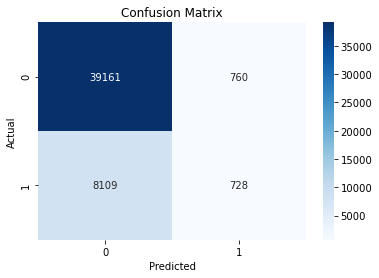

In [ ]:
# Example: Train a Random Forest
model_rf, auc_rf = train_model(df_cleaned, target_column='Churn', model_type='random_forest')



## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(df_test.drop(['CustomerID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': df_test[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probabilities})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!